### Part A

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

## Data Extraction & Exploration

In [2]:
df = pd.read_csv('CE802_P2_Data.csv')

In [3]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,-13.735,0,12.45320,5.9854,1473.45,4.74910,4.40040,-4850.82,1,9959.04,...,-86111.892,1.73,-3199.35,1.4892,-1.33420,16004.16,-11645.820,-6.99630,NaN,True
1,-5.171,1,12.16045,4.6222,783.15,4.99940,4.26300,378.78,1,10107.44,...,-86180.190,0.73,-3064.95,3.1206,-1.60960,16041.48,-9759.420,-4.27404,NaN,True
2,-38.650,1,12.55680,4.4096,2573.95,5.93000,3.47837,-5215.48,0,10971.04,...,-86151.360,0.73,-3638.85,1.9818,-0.49086,16422.78,-10775.220,-8.25900,NaN,False
3,-8.639,1,12.24362,8.5080,1499.68,4.32808,3.52954,-4378.42,0,9681.10,...,-244410.870,0.73,724.95,11.5620,-4.56800,16270.04,-9416.714,-5.57460,NaN,False
4,-14.730,0,13.05820,5.5188,1409.15,4.52420,3.55388,-1919.22,1,10965.64,...,-86252.400,0.73,-2607.15,2.5440,-1.02500,16548.78,-9797.820,-4.33848,NaN,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   int64  
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   float64
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   int64  
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   float64
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     500 non-null    float64
 20  Class   1000 non-null   bool   
dtypes: bool(1), float64(18), int64(2)
memo

In [5]:
df.shape

(1000, 21)

In [6]:
df.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20      500
Class      0
dtype: int64

In [7]:
df['F20'].isnull().sum()

500

In [8]:
df.duplicated().sum()

0

### Seperating Training and testing labels

In [9]:
y = df['Class']
X = df.drop('Class', axis = 1)

### Encoding categorical columns

In [10]:
lab = LabelEncoder()
y_transformed = lab.fit_transform(y)

### Box plot for detecting Outliers

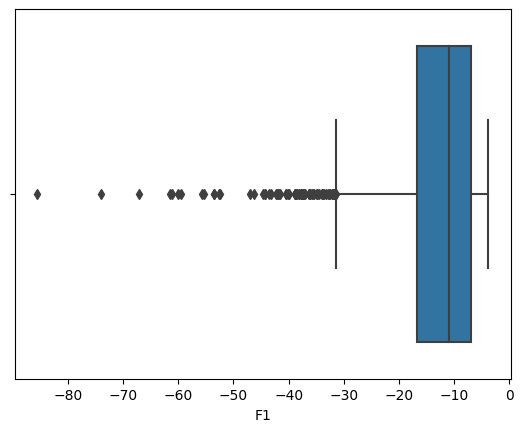

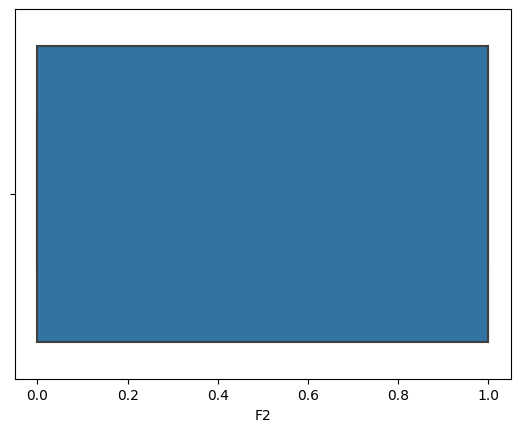

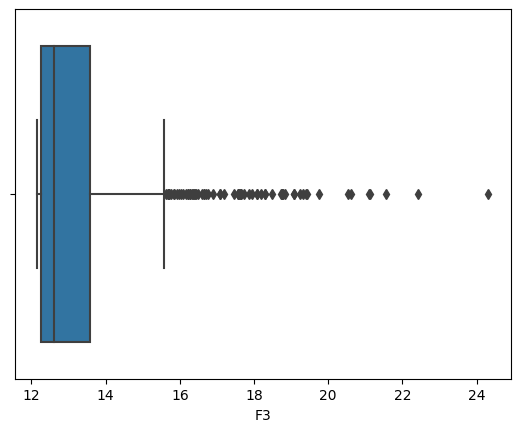

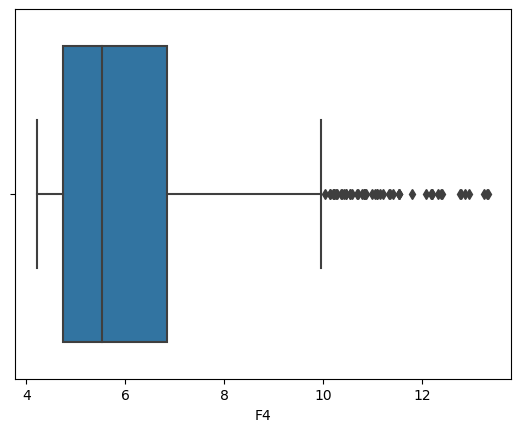

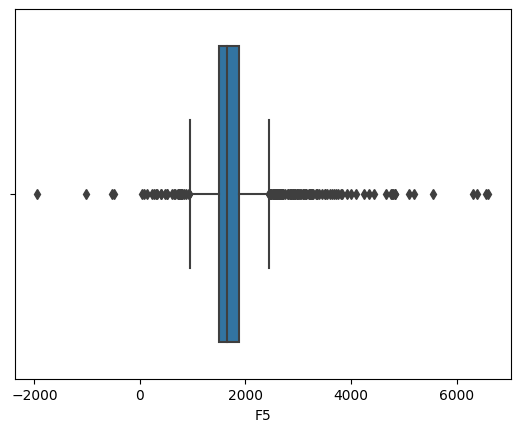

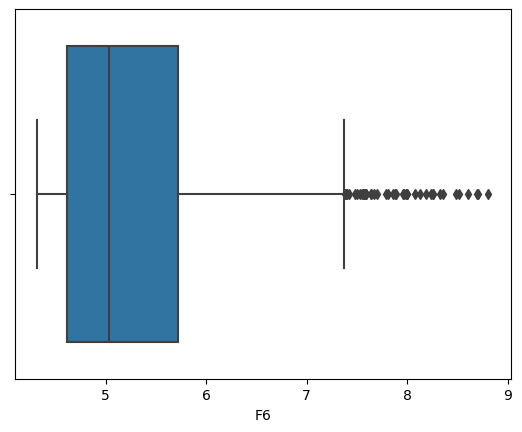

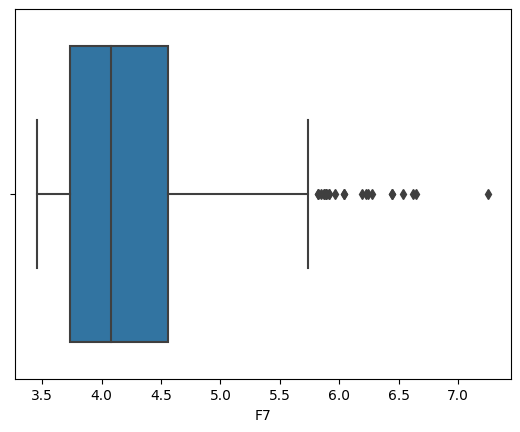

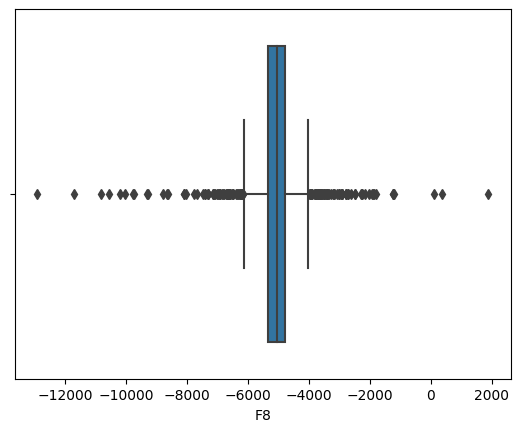

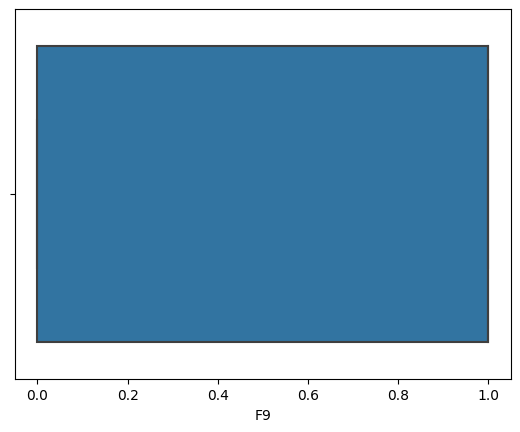

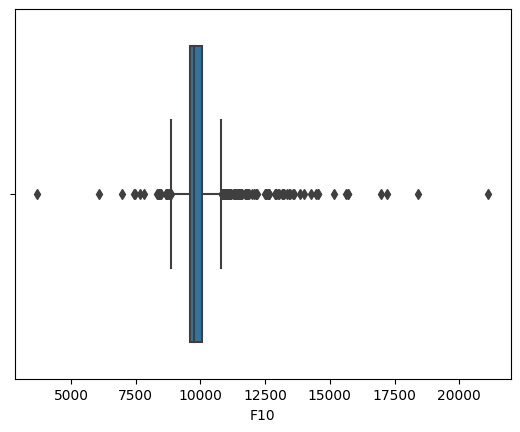

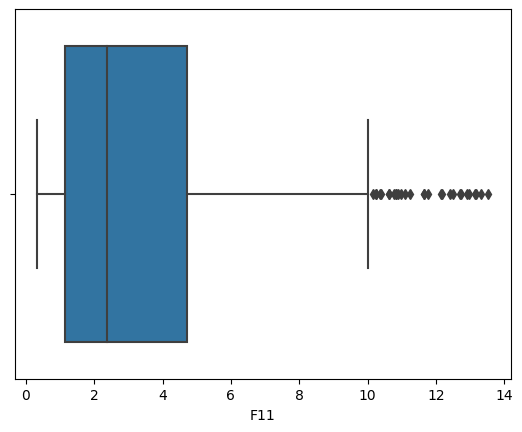

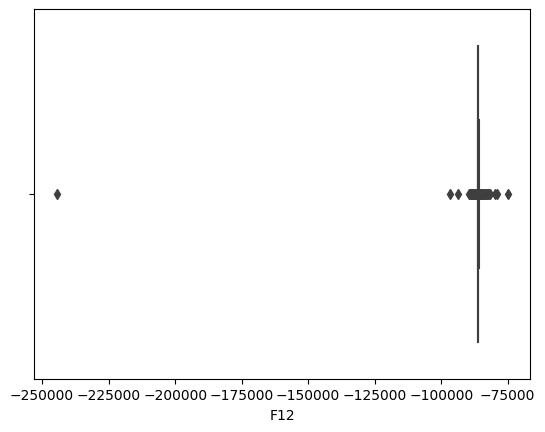

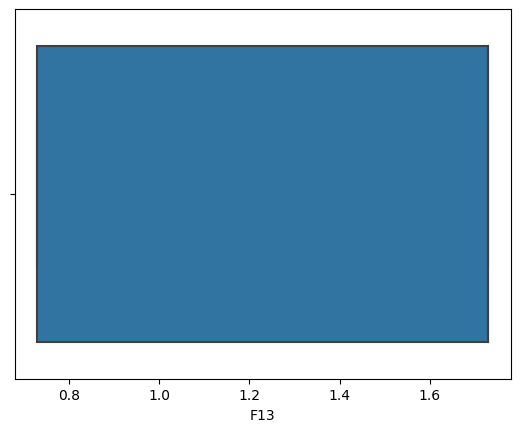

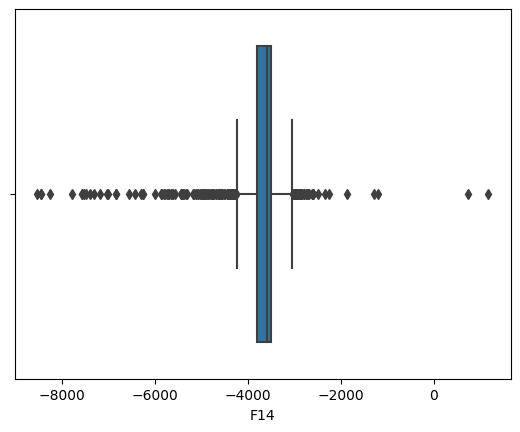

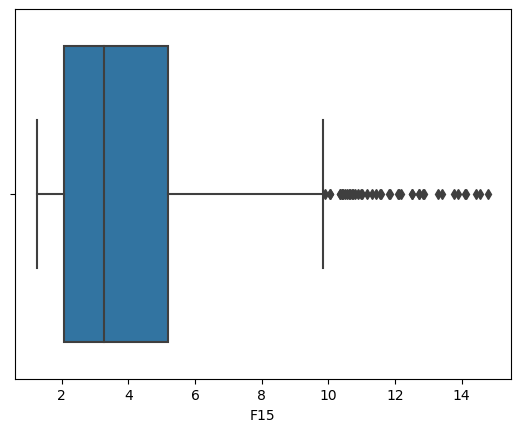

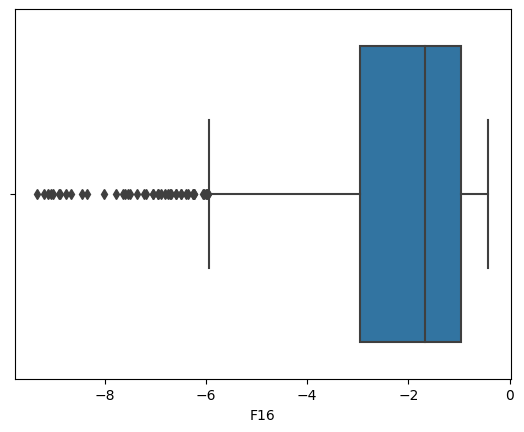

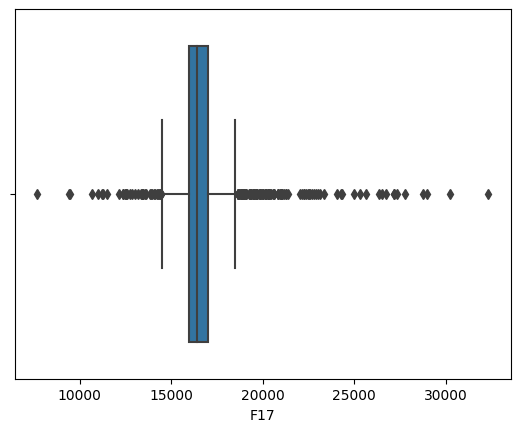

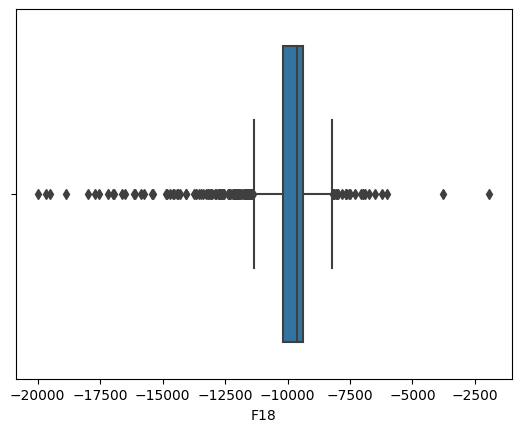

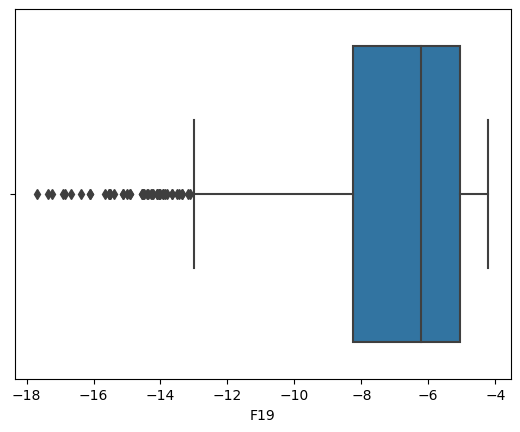

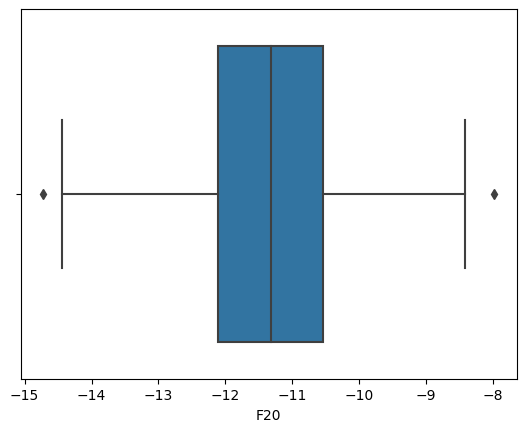

In [11]:
for i in X:
  sns.boxplot(x=df[i])
  plt.show();

### Removing Outliers & Imputing null values

In [12]:
def remove_outliers(colu):
  sorted(colu)
  Q1,Q3 = colu.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_limit = Q1 - (1.5*IQR)
  upper_limit = Q3 + (1.5*IQR)
  return lower_limit, upper_limit

In [13]:
for i in X:
  low_limit_col, up_limit_col = remove_outliers(df[i])
  df[i] = np.where(df[i] > up_limit_col, up_limit_col, df[i])
  df[i] = np.where(df[i] < low_limit_col, low_limit_col, df[i])

In [14]:
num_imp = SimpleImputer(strategy = 'median')
X['F20']= num_imp.fit_transform(X[['F20']])

In [15]:
X.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20
0,-13.735,0,12.45320,5.9854,1473.45,4.74910,4.40040,-4850.82,1,9959.04,6.8670,-86111.892,1.73,-3199.35,1.4892,-1.33420,16004.16,-11645.820,-6.99630,-11.32
1,-5.171,1,12.16045,4.6222,783.15,4.99940,4.26300,378.78,1,10107.44,9.4710,-86180.190,0.73,-3064.95,3.1206,-1.60960,16041.48,-9759.420,-4.27404,-11.32
2,-38.650,1,12.55680,4.4096,2573.95,5.93000,3.47837,-5215.48,0,10971.04,2.0373,-86151.360,0.73,-3638.85,1.9818,-0.49086,16422.78,-10775.220,-8.25900,-11.32
3,-8.639,1,12.24362,8.5080,1499.68,4.32808,3.52954,-4378.42,0,9681.10,2.0220,-244410.870,0.73,724.95,11.5620,-4.56800,16270.04,-9416.714,-5.57460,-11.32
4,-14.730,0,13.05820,5.5188,1409.15,4.52420,3.55388,-1919.22,1,10965.64,4.3140,-86252.400,0.73,-2607.15,2.5440,-1.02500,16548.78,-9797.820,-4.33848,-11.32


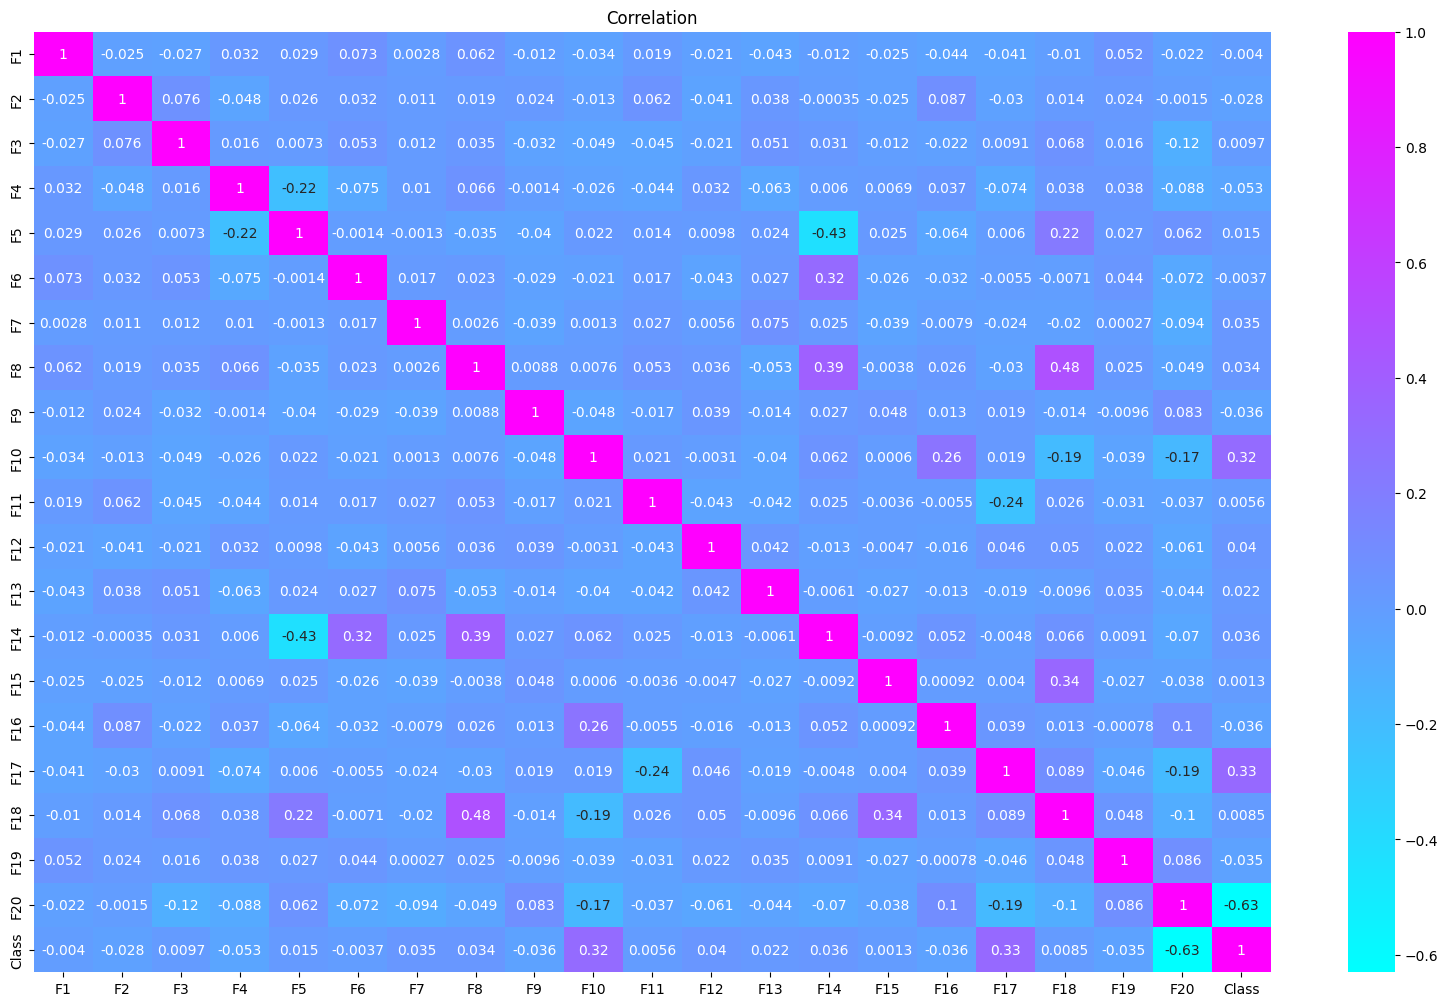

In [16]:
figure = plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True,cmap=plt.cm.cool)
plt.tight_layout()
plt.title('Correlation')
plt.show()

In [17]:
min_max_scaler = MinMaxScaler()
scaled_X = min_max_scaler.fit_transform(X)

## Spiliting Data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y_transformed, test_size=0.2, random_state=42)

## Decision Tree Classifier

In [19]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
clf_pred_test = clf.predict(X_test)
print('Accuracy score on testing set', accuracy_score(y_test, clf_pred_test))
print('f1 score', f1_score(y_test, clf_pred_test))
print('recall score', recall_score(y_test, clf_pred_test))
print('precision_score', precision_score(y_test, clf_pred_test))

Accuracy score on testing set 0.845
f1 score 0.8410256410256411
recall score 0.82
precision_score 0.8631578947368421


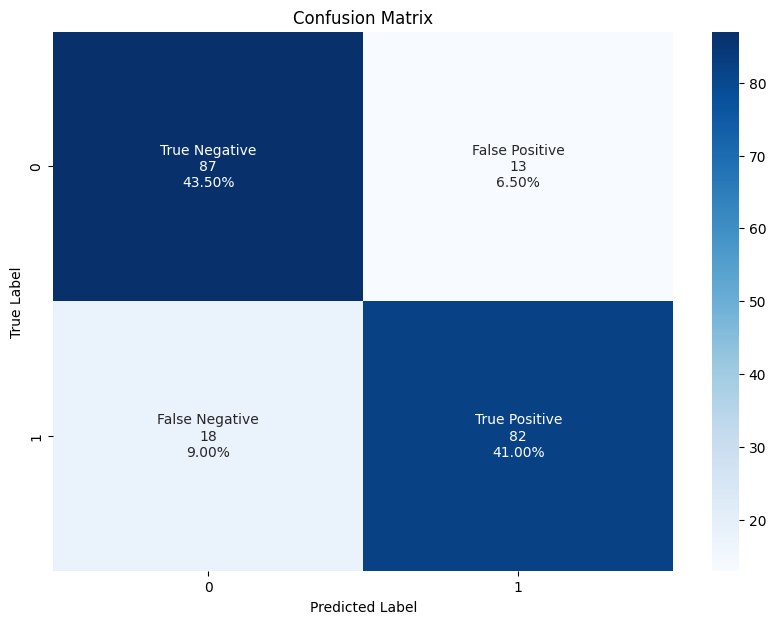

In [21]:
cm = confusion_matrix(y_test, clf_pred_test)
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentage = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1,v2,v3 in zip(group_names, group_counts, group_percentage)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(10,7))
s = sns.heatmap(cm, annot=labels, fmt='',cmap='Blues')
s.set(xlabel ='Predicted Label', ylabel ='True Label', title ='Confusion Matrix')
plt.show()

## Naive Bays Classifier

In [22]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
nb_cls = GaussianNB()

# Model training
nb_cls.fit(X_train, y_train)

GaussianNB()

In [23]:
cls_pred_test = nb_cls.predict(X_test)
print('Accuracy score on testing set', accuracy_score(y_test, cls_pred_test))
print('f1 score', f1_score(y_test, cls_pred_test))
print('recall score', recall_score(y_test, cls_pred_test))
print('precision_score', precision_score(y_test, cls_pred_test))

Accuracy score on testing set 0.595
f1 score 0.7054545454545454
recall score 0.97
precision_score 0.5542857142857143


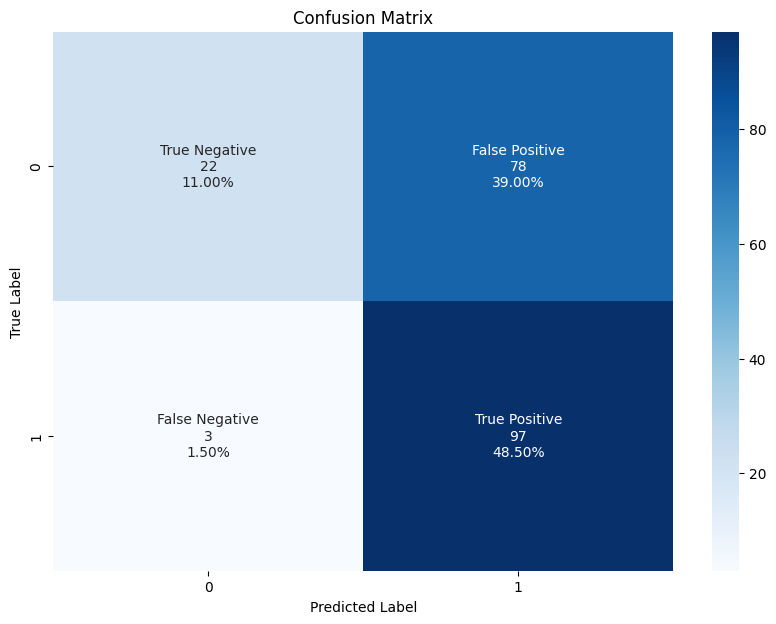

In [24]:
cm_2 = confusion_matrix(y_test, cls_pred_test)
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cm_2.flatten()]
group_percentage = ['{0:.2%}'.format(value) for value in cm_2.flatten() / np.sum(cm_2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1,v2,v3 in zip(group_names, group_counts, group_percentage)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(10,7))
s = sns.heatmap(cm_2, annot=labels, fmt='',cmap='Blues')
s.set(xlabel ='Predicted Label', ylabel ='True Label', title ='Confusion Matrix')
plt.show()

## SVM 

In [25]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [26]:
svm_pred_test = model.predict(X_test)
print('Accuracy score on testing set', accuracy_score(y_test, svm_pred_test))
print('f1 score', f1_score(y_test, svm_pred_test))
print('recall score', recall_score(y_test, svm_pred_test))
print('precision_score', precision_score(y_test, svm_pred_test))

Accuracy score on testing set 0.74
f1 score 0.7425742574257426
recall score 0.75
precision_score 0.7352941176470589


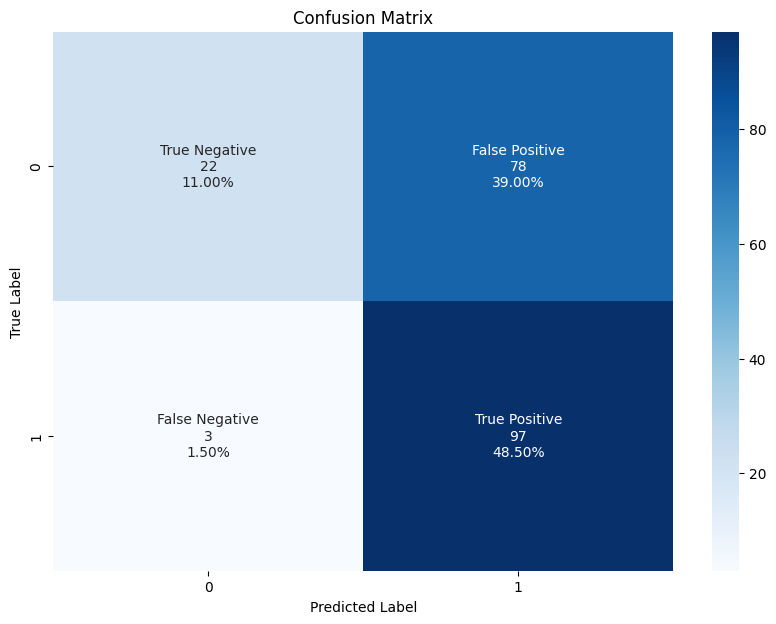

In [27]:
cm_3 = confusion_matrix(y_test, cls_pred_test)
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cm_3.flatten()]
group_percentage = ['{0:.2%}'.format(value) for value in cm_3.flatten() / np.sum(cm_3)]
labels = [f'{v1}\n{v2}\n{v3}' for v1,v2,v3 in zip(group_names, group_counts, group_percentage)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(10,7))
s = sns.heatmap(cm_3, annot=labels, fmt='',cmap='Blues')
s.set(xlabel ='Predicted Label', ylabel ='True Label', title ='Confusion Matrix')
plt.show()

### Part B

## Applying Best model on test dataset

In [28]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P2_Test.csv')
test_df.head()

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()


imp = SimpleImputer(strategy = 'median')
test_data['F20']= imp.fit_transform(test_data[['F20']])

# test_data.fillna()

predicted = clf.predict(test_data) # CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

test_df.iloc[:,-1] = test_df.iloc[:,-1].replace({0:'True', 1:'False'})


# Save to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])